# Demo of DSP package 
### Authors: Charalampos E. Tsourakakis (ctsourak), Tianyi Chen (ctony)


To install the [DSD package](https://pypi.org/project/dsd/0.0.1/), run **pip install dsd==0.0.1**. For more on the densest subgraph problem (DSP), visit [Tsourakakis web page](https://tsourakakis.com/dense-subgraph-discovery-theory-and-applications-tutorial-sdm-2021/).


In [1]:
!pip3 install dsd==0.0.1

In [2]:
import networkx as nx
from dsd import *
from datetime import datetime
import matplotlib.pyplot as plt 
%matplotlib inline 

We load a small popular graph dataset to illustrate how to run the algorithms. 

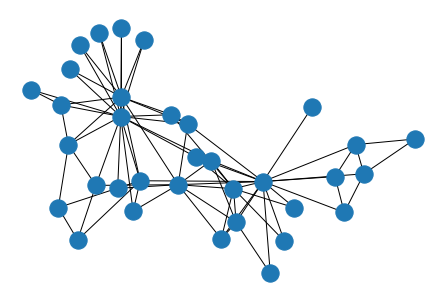

In [3]:
karate_graph = nx.karate_club_graph()
karate_edges = [[e[0],e[1]] for e in nx.karate_club_graph().edges()]
nx.draw(karate_graph)

In [4]:
print('exact max flow method')

start = datetime.now()
exact_R = exact_densest(karate_graph)
print('subgraph induced by', exact_R[0])
print('density =', exact_R[1])
print('run time', datetime.now()-start, '\n')


print('flowless method')
start = datetime.now()
flowless_R = flowless(karate_graph, 5)
print('subgraph induced by', flowless_R[0])
print('density =', flowless_R[1])
print('run time', datetime.now()-start, '\n')

print('greedy method')
start = datetime.now()
greedy_R = greedy_charikar(karate_graph)
print('subgraph induced by', greedy_R[0])
print('density =', greedy_R[1])
print('run time', datetime.now()-start, '\n')

exact max flow method
subgraph induced by [0, 1, 2, 3, 32, 33, 7, 8, 13, 19, 23, 27, 28, 29, 30, 31]
density = 2.6249003690831803
run time 0:00:00.117885 

flowless method
subgraph induced by [0, 1, 2, 3, 7, 8, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33]
density = 2.611111111111111
run time 0:00:00.010541 

greedy method
subgraph induced by [0, 1, 2, 3, 7, 8, 13, 19, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33]
density = 2.611111111111111
run time 0:00:00.003463 



Let's see an example where the performance of greedy is less than flowless. 

In [5]:
edges = [[0,1],[0,2],[1,2],[2,3],[3,4],[1,3],[1,4],[2,4],[3,5],[4,5],[6,7],[6,8],[6,9],[7,8],[7,9],[8,9]]
print('exact max flow method')

start = datetime.now()
exact_R = exact_densest(edges)
print('subgraph induced by', exact_R[0])
print('density =', exact_R[1])
print('run time', datetime.now()-start, '\n')


print('flowless method, 5 iterations')

start = datetime.now()
flowless_R = flowless(edges, 5)
print('subgraph induced by', flowless_R[0])
print('density =', flowless_R[1])
print('run time', datetime.now()-start, '\n')

print('greedy method')

start = datetime.now()
greedy_R = greedy_charikar(edges)
print('subgraph induced by', greedy_R[0])
print('density =', greedy_R[1])
print('run time', datetime.now()-start, '\n')

exact max flow method
subgraph induced by [0, 1, 2, 3, 4, 5]
density = 1.66328125
run time 0:00:00.035361 

flowless method, 5 iterations
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
subgraph induced by [0, 1, 2, 3, 4, 5]
density = 1.6666666666666667
run time 0:00:00.002452 

greedy method
iteration 1
subgraph induced by [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
density = 1.6
run time 0:00:00.001100 



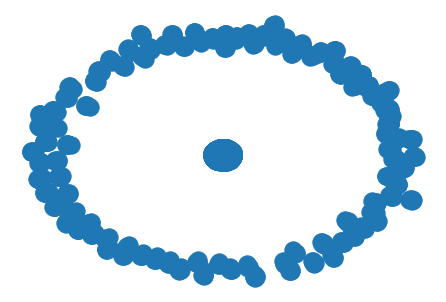

In [8]:
def bad_charikar_instance(d=10,D=1000,copies=10):
    ''' This function returns an instance that is really bad for Charikar's greedy algorithm.
    This graph is the union of K(d,D), and copies times K(d+2),...,K(d+2). 
    '''
    G = nx.complete_bipartite_graph(d,D)
    for i in range(copies):
            G = nx.disjoint_union(G,nx.complete_graph(d+2))
    return G

B = bad_charikar_instance(5,1000,100)
nx.draw(B)

In [9]:
print('exact max flow method')

start = datetime.now()
exact_R = exact_densest(B)
print('subgraph induced by', exact_R[0])
print('density =', exact_R[1])
print('run time', datetime.now()-start, '\n')


print('flowless method')

start = datetime.now()
flowless_R = flowless(B, 5)
print('subgraph induced by', flowless_R[0])
print('density =', flowless_R[1])
print('run time', datetime.now()-start, '\n')

print('greedy method')

start = datetime.now()
greedy_R = greedy_charikar(B)
print('subgraph induced by', greedy_R[0])
print('density =', greedy_R[1])
print('run time', datetime.now()-start, '\n')

exact max flow method
subgraph induced by [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 21

subgraph induced by complete_bipartite_graph(5,1000)
density = 4.164222873900293
run time 0:00:02.764145 



# k-clique dense subgraph

The package allows to take a list of hyperedges, that correspond to $k$-cliques in the graph. Such list can be generated using [MACE](http://research.nii.ac.jp/~uno/code/mace.html), namely a file whose each line contains a k-clique. Let's see a small example where the input is a set of five triangles. 

In [10]:
clique_list = [[0,1,2],[0,1,3],[0,3,2],[1,3,2],[0,4,5]]

In [11]:
print('exact max flow method')

start = datetime.now()
print('subgraph induced by', exact_densest(clique_list)[0])
print('run time', datetime.now()-start, '\n')

print('flowless method')
start = datetime.now()
print('subgraph induced by', flowless(clique_list, 2)[0])
print('run time', datetime.now()-start, '\n')

print('greedy method')
start = datetime.now()
print('subgraph induced by', greedy_charikar(clique_list)[0])
print('run time', datetime.now()-start, '\n')


exact max flow method
subgraph induced by [0, 1, 2, 3]
run time 0:00:00.012618 

flowless method
iteration 1
iteration 2
subgraph induced by [0, 1, 2, 3]
run time 0:00:00.000565 

greedy method
iteration 1
subgraph induced by [0, 1, 2, 3]
run time 0:00:00.000313 

